# Sprawdzenie modelu na testowym dataset


In [68]:
import pathlib
from joblib import load
import pandas as pd
from fastai.tabular.all import *

pathlib.PosixPath = pathlib.WindowsPath

with open(r"random_forest_drowsiness_model.pkl", "rb") as input_file:
    rf = load(input_file)

nn = load_learner(r"nn_drowsiness_model.pkl")

path = Path(r'E:\Szkoła i Studia\Mechatronika\Semestr 7\Praca dyplomowa\Dataset\tabular_database\excel_files')

test_df = pd.read_excel(path/'testing_data.xlsx')

# Przygotowanie danych

In [69]:
def proc_data(df):
    df['Yawning'] = pd.Categorical(df.Yawning)
    df['Drowsy'] = pd.Categorical(df.Drowsy)
    df = df.drop(columns = ["Column1", "Image"])
    df = df.drop(columns = ["Yawning"])
    df = df.rename(columns={"Drowsy": "Is_drowsy"})
    return df

test_df = proc_data(test_df)
print(test_df.head())

        MAR       Roll     Pitch       EAR   Is_drowsy
0  0.194474  -2.670679 -3.569557  0.213012      Drowsy
1  0.120848  25.391328 -7.526830  0.326617  Not_drowsy
2  0.192915 -61.439218  2.194628  0.315493  Not_drowsy
3  0.250130  55.942234  2.336539  0.312477  Not_drowsy
4  0.243395  15.073668  4.767441  0.311291  Not_drowsy


In [70]:
def xs_y(df):
    xs = df[continuous].copy()
    return xs, df[dependant] if dependant in df else None

continuous = ['MAR', 'EAR', 'Roll', 'Pitch']
dependant = 'Is_drowsy'

test_xs, test_y = xs_y(test_df)

test_dl = nn.dls.test_dl(test_df)

# Testowanie modeli

## Losowy las decyzyjny

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
accuracy_rf = accuracy_score(test_y, rf.predict(test_xs))
report_rf = classification_report(test_y, rf.predict(test_xs))
cm_rf = confusion_matrix(test_y, rf.predict(test_xs))

print("Accuracy:", accuracy_rf)

Accuracy: 0.8947368421052632


In [73]:
print("Classification Report:\n", report_rf)

Classification Report:
               precision    recall  f1-score   support

      Drowsy       0.85      0.96      0.90       237
  Not_drowsy       0.96      0.83      0.89       238

    accuracy                           0.89       475
   macro avg       0.90      0.89      0.89       475
weighted avg       0.90      0.89      0.89       475



In [74]:
print("Confusion Matrix:\n", cm_rf)

Confusion Matrix:
 [[228   9]
 [ 41 197]]


## Sieć neuronowa

In [75]:
preds, targets = nn.get_preds(dl=test_dl)

# Calculate metrics
test_accuracy = accuracy(preds, targets)
test_error_rate = error_rate(preds, targets)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Error Rate: {test_error_rate}")

Test Accuracy: TensorBase(0.8716)
Test Error Rate: TensorBase(0.1284)


# Tworzenie wykresów dla modelu

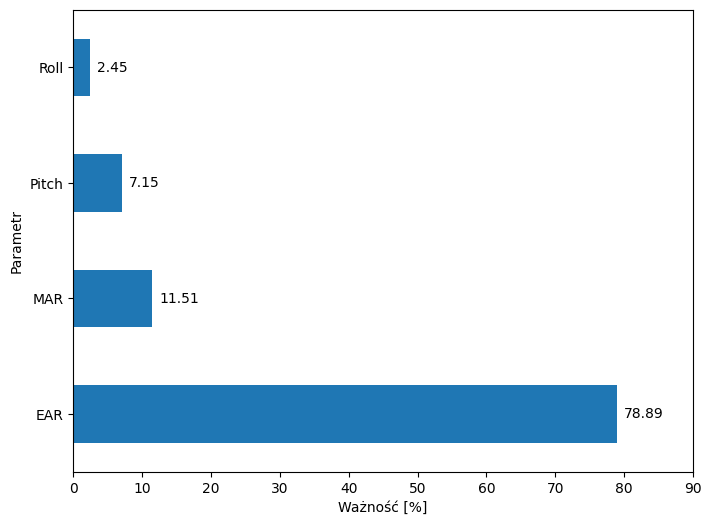

In [76]:
importance = pd.DataFrame(dict(Parametr=test_xs.columns, Znaczenie=rf.feature_importances_*100)).sort_values("Znaczenie", ascending = False)
ax = importance.plot(x='Parametr', y='Znaczenie', kind='barh', legend=False, figsize=(8, 6))
plt.xlabel('Ważność [%]')
ax.bar_label(ax.containers[0], fmt='%.2f', padding=5)
plt.xlim(0, 90)
plt.show()


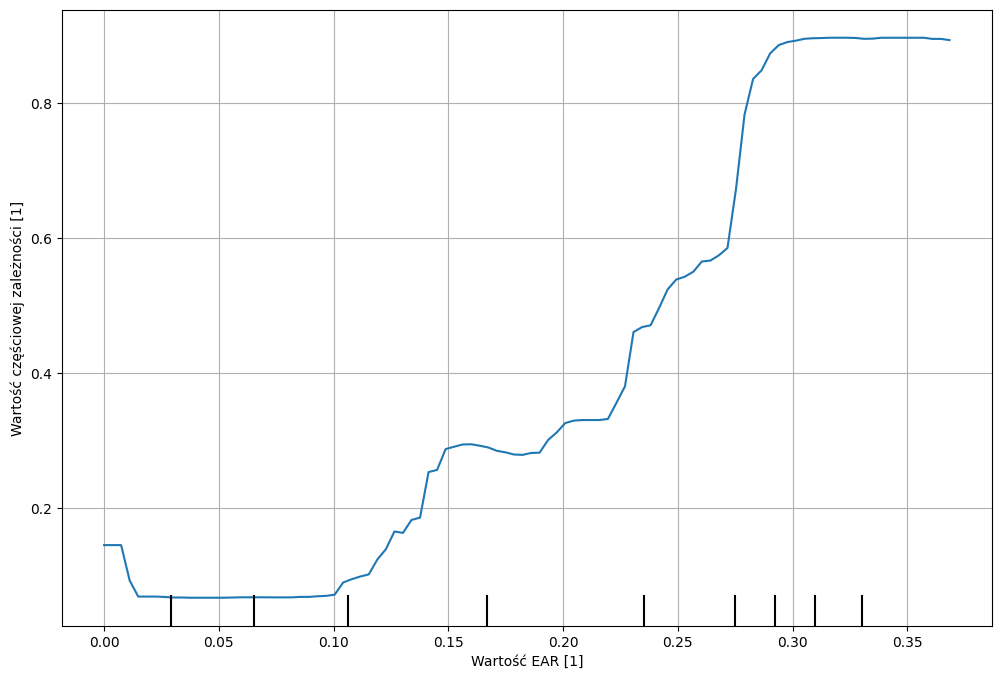

In [77]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['EAR'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Wartość częściowej zależności [1]")
pdp.axes_[0][0].set_xlabel("Wartość EAR [1]")
pdp.axes_[0][0].grid(True)
plt.show()


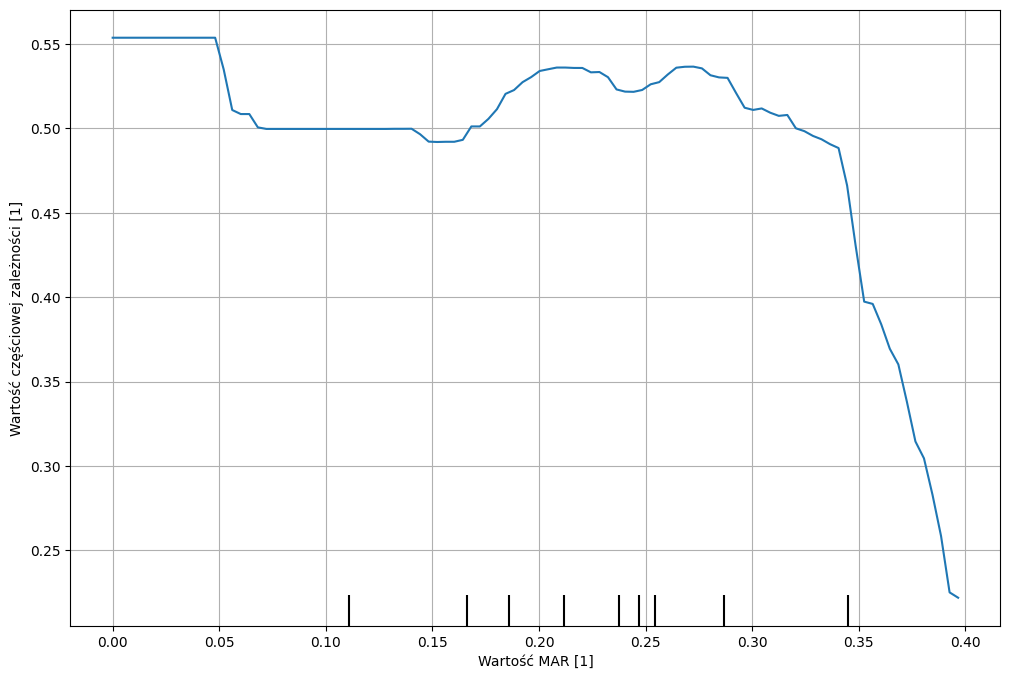

In [78]:

fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['MAR'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Wartość częściowej zależności [1]")
pdp.axes_[0][0].set_xlabel("Wartość MAR [1]")
pdp.axes_[0][0].grid(True)
plt.show()

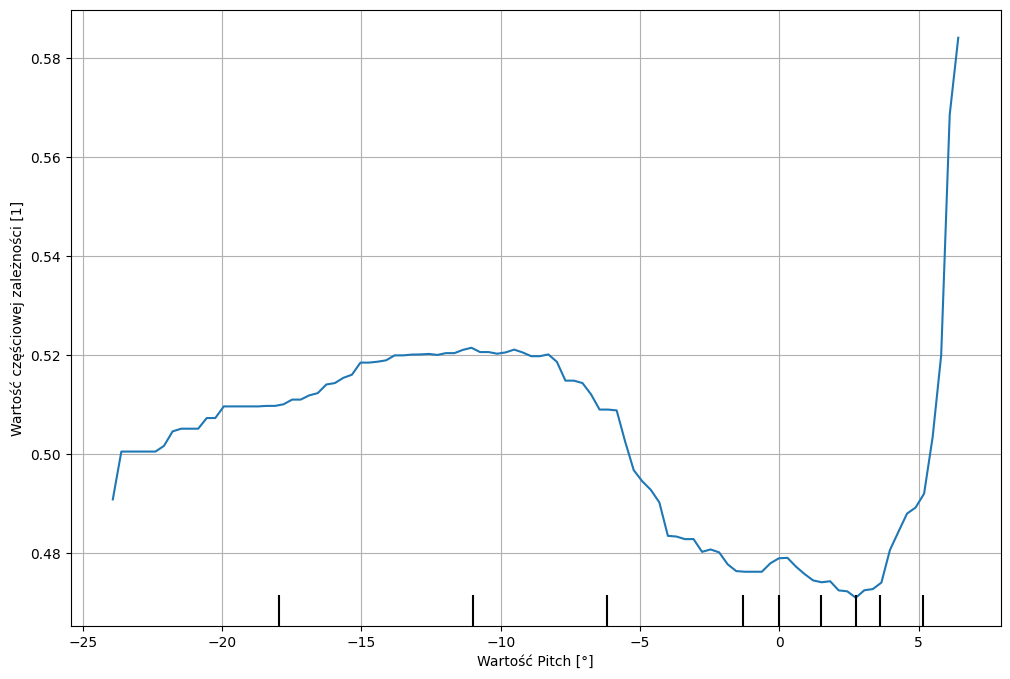

In [81]:

fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['Pitch'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Wartość częściowej zależności [1]")
pdp.axes_[0][0].set_xlabel("Wartość Pitch [°]")
pdp.axes_[0][0].grid(True)
plt.show()

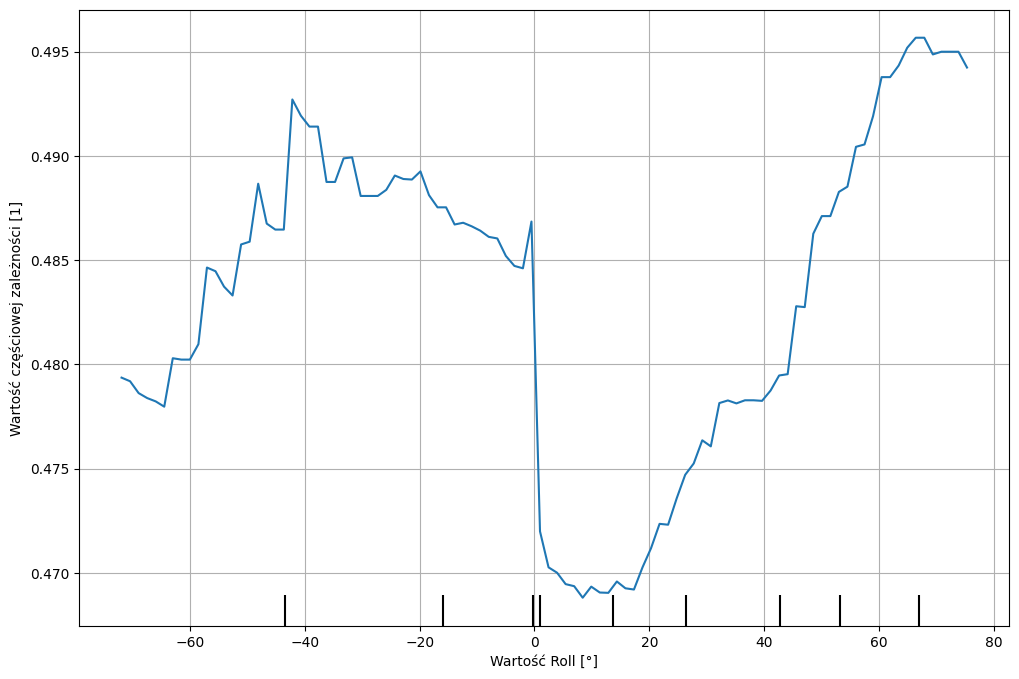

In [82]:

fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['Roll'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Wartość częściowej zależności [1]")
pdp.axes_[0][0].set_xlabel("Wartość Roll [°]")
pdp.axes_[0][0].grid(True)
plt.show()